In [1]:
import choix
import networkx as nx
import numpy as np

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
from sqlalchemy import func
from app.db import Base, User, Annotation, Crop, Page, Record, Set, RecordCrop

if __name__ == "__main__":
    engine = create_engine('sqlite:///C:\\Users\\LachubCz_NTB\\Documents\\GitHub\\pero-web-data\\database.sqlite3',
                           convert_unicode=True,
                           connect_args={'check_same_thread': False})
    db_session = scoped_session(sessionmaker(autocommit=False,
                                             autoflush=False,
                                             bind=engine))
    Base.query = db_session.query_property()
    Base.metadata.create_all(bind=engine)

    records_set_1 = Record.query.filter(Record.set_id == 11).all()
    
    records = records_set_1
    
    not_empty = []
    for i, item in enumerate(records):
        if len(item.annotations) > 0:
            not_empty.append(item)

    print(len(records), len(not_empty))

    prep_data = []
    set_ = set()
    for i, item in enumerate(not_empty):
        record_crop = RecordCrop.query.filter(RecordCrop.record_id == item.id).order_by(RecordCrop.order).all()
        _01 = 0
        _10 = 0
        for e, elem in enumerate(item.annotations):
            if elem.annotation == "01":
                _01 += 1
            else:
                _10 += 1
        if _01 > _10:
            prep_data.append([record_crop[0].crop_id, record_crop[1].crop_id])
            set_.add(record_crop[0].crop_id)
            set_.add(record_crop[1].crop_id)
        elif _01 < _10:
            prep_data.append([record_crop[1].crop_id, record_crop[0].crop_id])
            set_.add(record_crop[0].crop_id)
            set_.add(record_crop[1].crop_id)
    
    n_items = len(set_)
    set_ = sorted(list(set_))
    mapping = dict()
    for i in range(len(set_)):
        mapping[i] = set_[0]
        for e, elem in enumerate(prep_data):
            if elem[0] == set_[0]:
                elem[0] = i
            if elem[1] == set_[0]:
                elem[1] = i
        set_ = set_[1:]
    
    data = []
    
    for i, item in enumerate(prep_data):
        data.append((item[0], item[1]))

600 600


In [2]:
params = choix.ilsr_pairwise(n_items, data, 0.0001, max_iter=1000)
print(params)

[ -4.563  11.546  17.506  18.663  21.167  18.526   6.765   8.378  20.219
  17.866   7.164  20.66   14.512  18.649   6.57    7.671   7.593  10.78
 -19.737 -27.738  13.977  13.749  18.384   8.617   3.526   8.488  -5.367
 -16.085   4.486   6.489 -11.359 -15.204  -2.836 -11.619 -42.018 -24.875
  -8.022   7.977   0.387   4.822   8.347 -41.322 -11.073  20.45  -35.988
 -31.743 -23.987 -20.402]


In [3]:
hundred = []
for i, item in enumerate(np.argsort(params)):
    if i % 1 == 0:
        hundred.append(mapping[item])
    
    #print(mapping[item])
print(hundred)

[1616, 2496, 6793, 6813, 1087, 1618, 6829, 7202, 1082, 1379, 1394, 1517, 1393, 2591, 1621, 1333, 13, 1409, 1948, 1314, 1387, 1949, 1389, 1051, 595, 1014, 1064, 1057, 1671, 2083, 1001, 1326, 1309, 1066, 100, 1121, 1103, 1043, 101, 1007, 1187, 310, 1048, 126, 1005, 4870, 1041, 130]


In [4]:
min_, max_ = min(params), max(params)
normalized = params.copy()
for i, val in enumerate(params):
    normalized[i] = (val-min_) / (max_-min_)

print(normalized)

[ 0.593  0.848  0.942  0.96   1.     0.958  0.772  0.798  0.985  0.948
  0.778  0.992  0.895  0.96   0.769  0.786  0.785  0.836  0.353  0.226
  0.886  0.883  0.956  0.801  0.721  0.799  0.58   0.41   0.736  0.768
  0.485  0.424  0.62   0.481  0.     0.271  0.538  0.791  0.671  0.741
  0.797  0.011  0.49   0.989  0.095  0.163  0.285  0.342]


1616 0.0


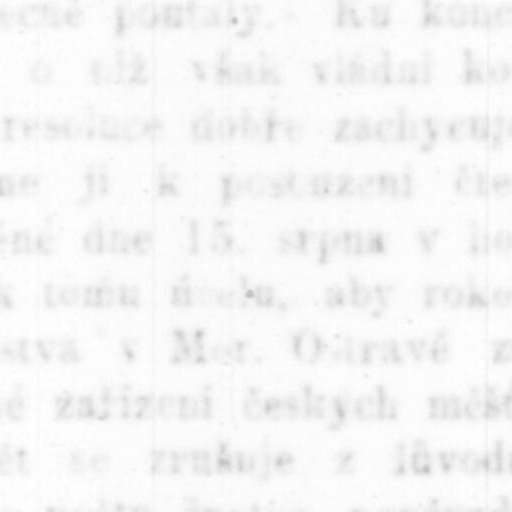

2496 0.0110042954211


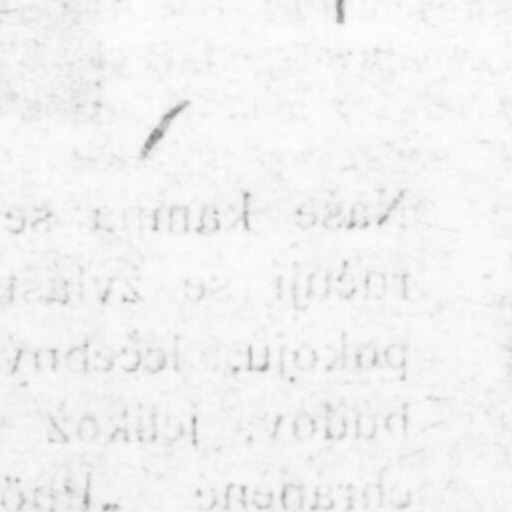

6793 0.0954332712531


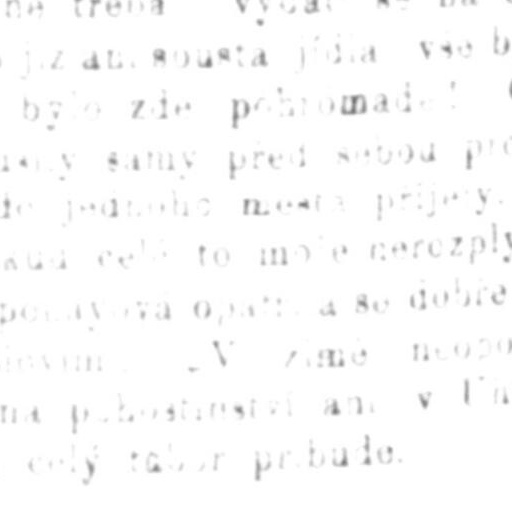

6813 0.162612614076


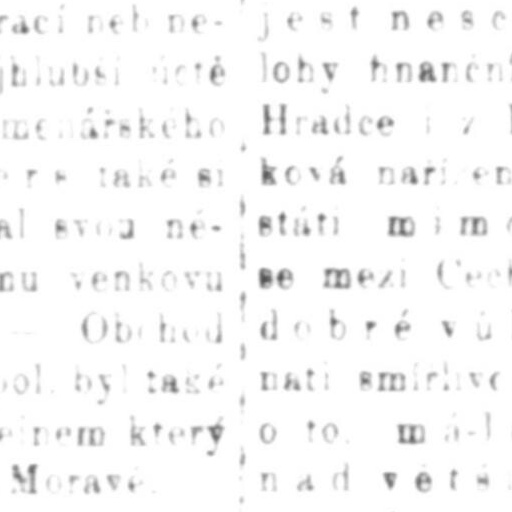

1087 0.226004125119


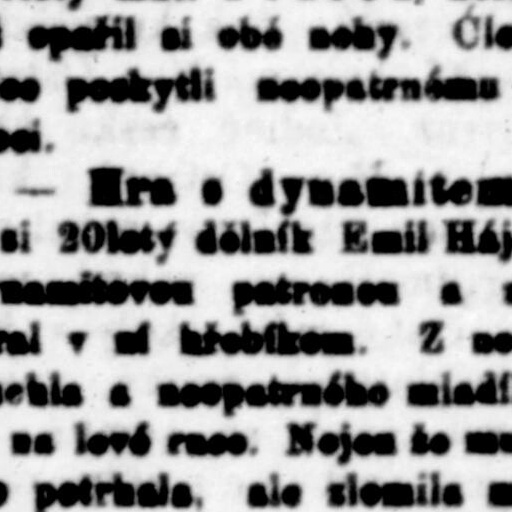

1618 0.27131472375


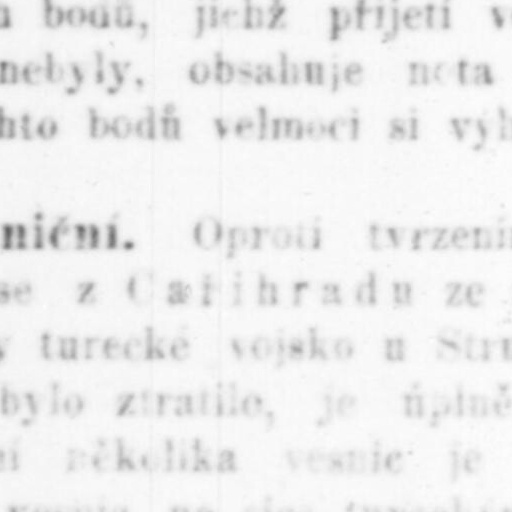

6829 0.285370522641


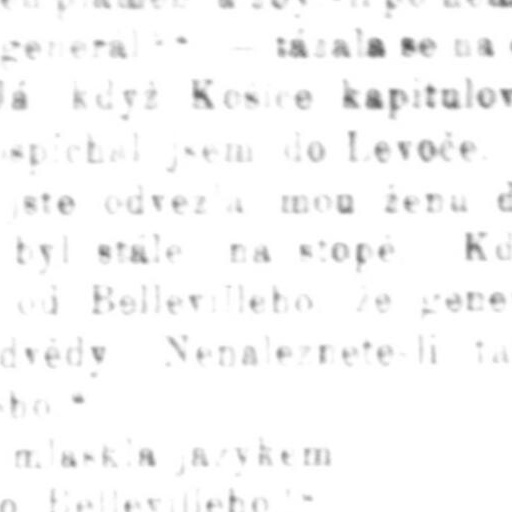

7202 0.342094829802


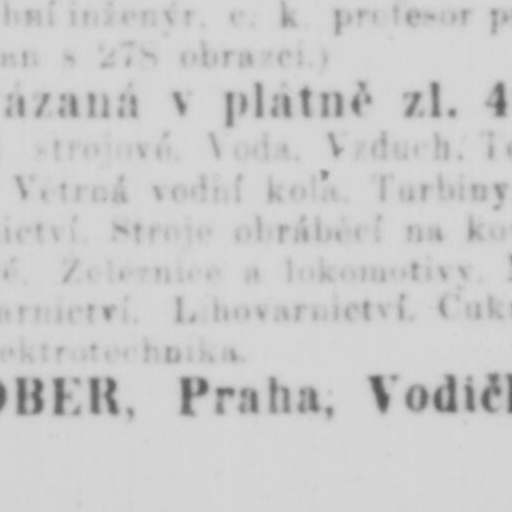

1082 0.352633525348


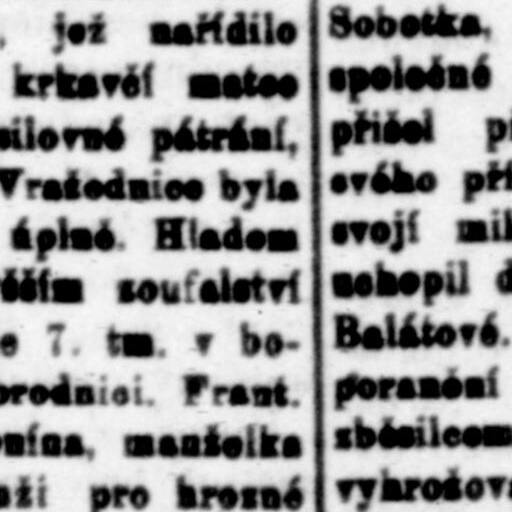

1379 0.410431529821


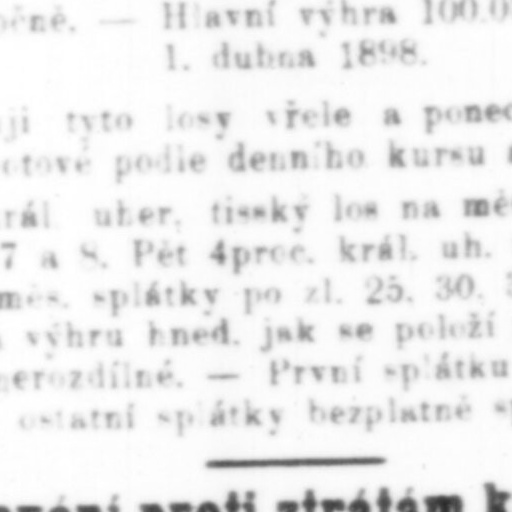

1394 0.42436581293


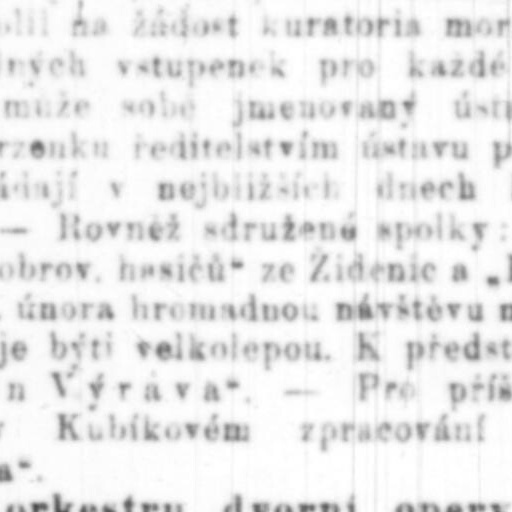

1517 0.481107129551


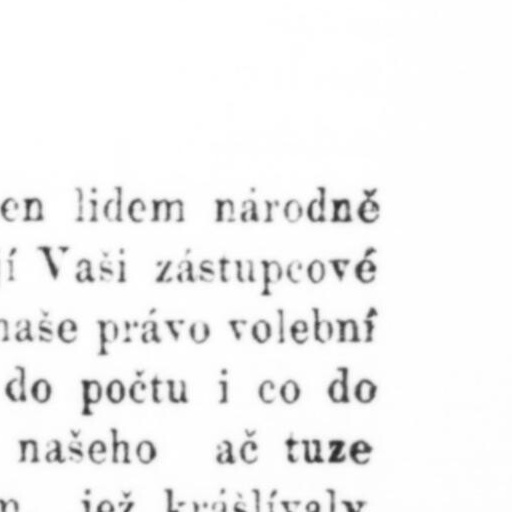

1393 0.48522091697


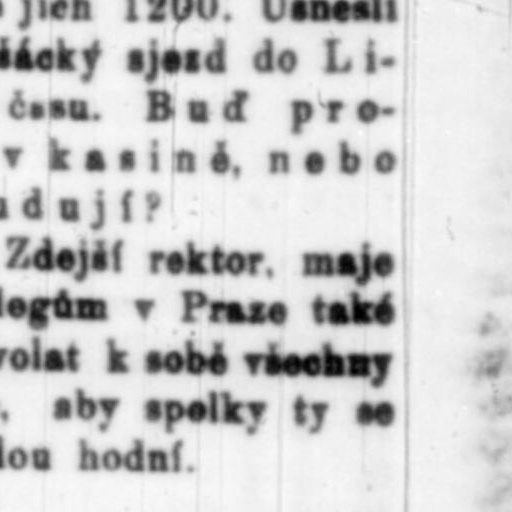

2591 0.489756829727


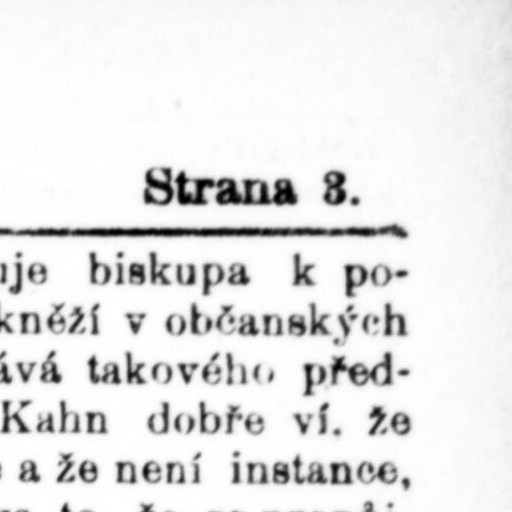

1621 0.538035967972


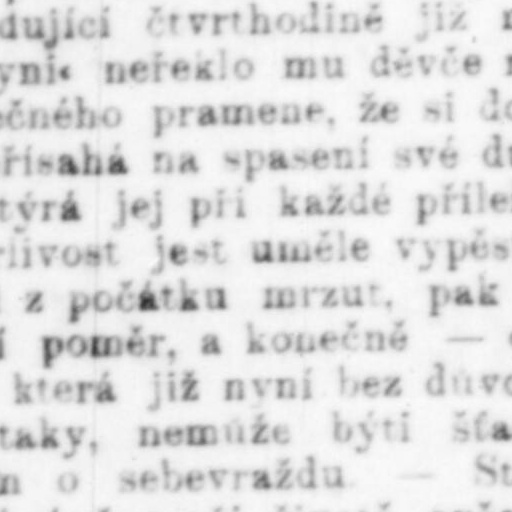

1333 0.580059701162


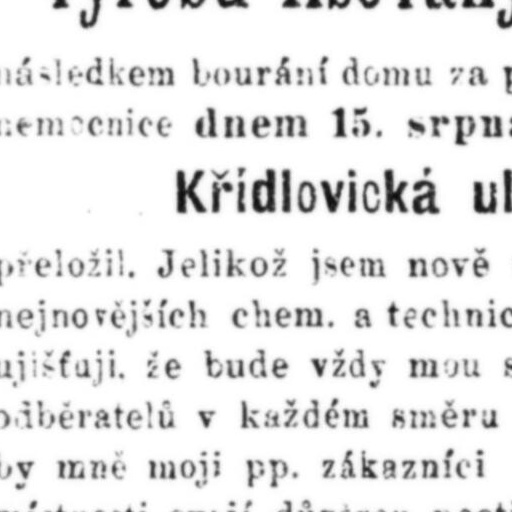

13 0.592784242994


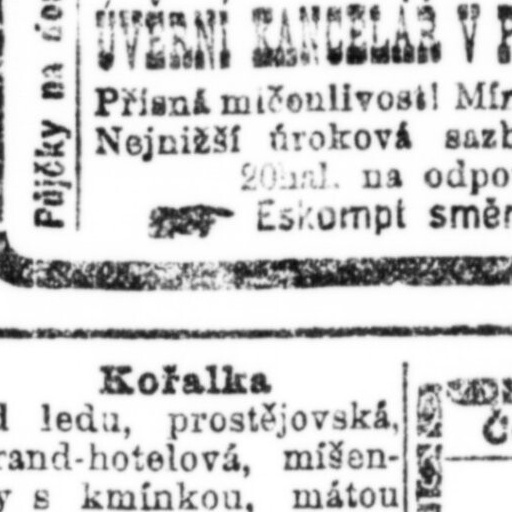

1409 0.620119712266


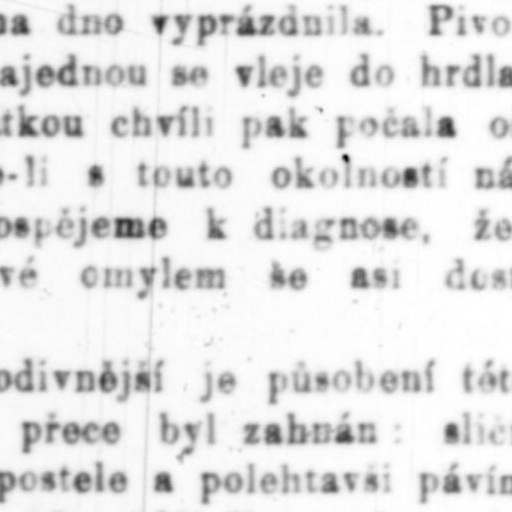

1948 0.671120995086


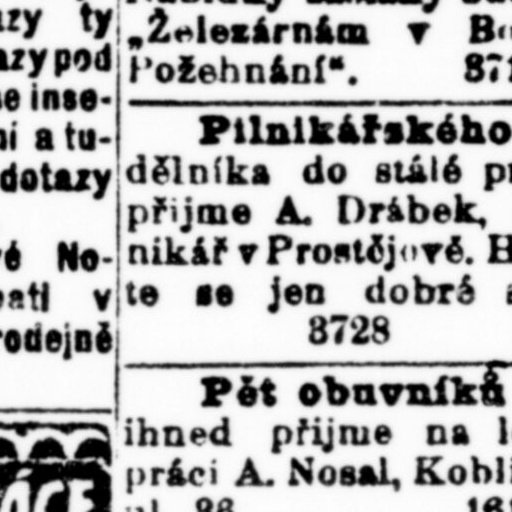

1314 0.720796378061


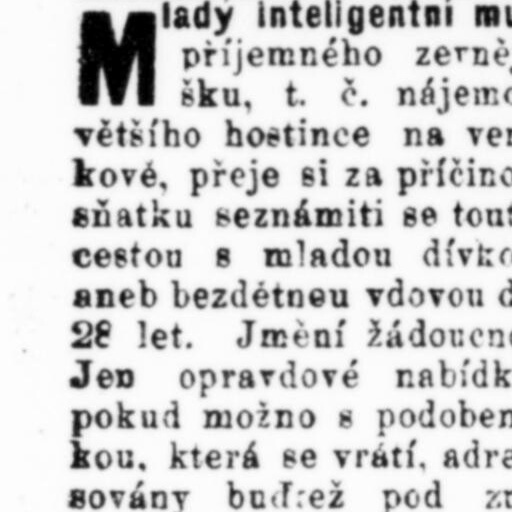

1387 0.735994825366


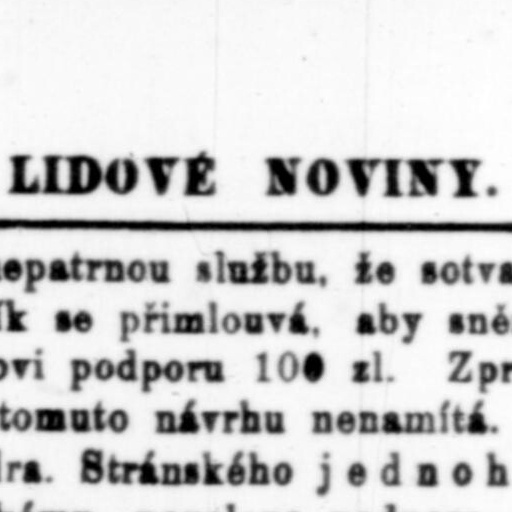

1949 0.741318982418


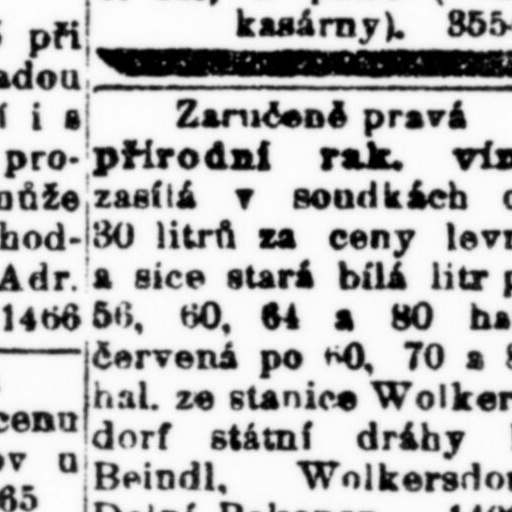

1389 0.767690879565


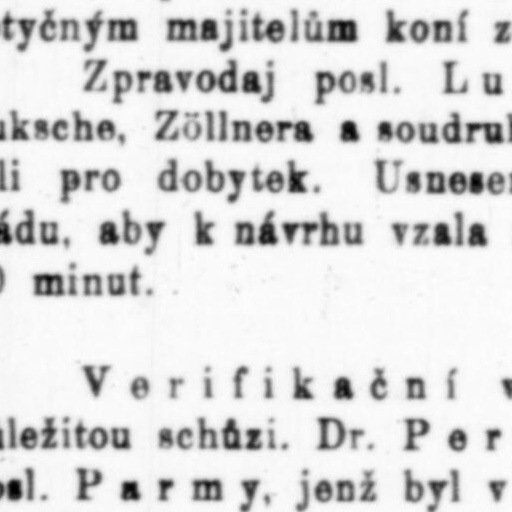

1051 0.768973568027


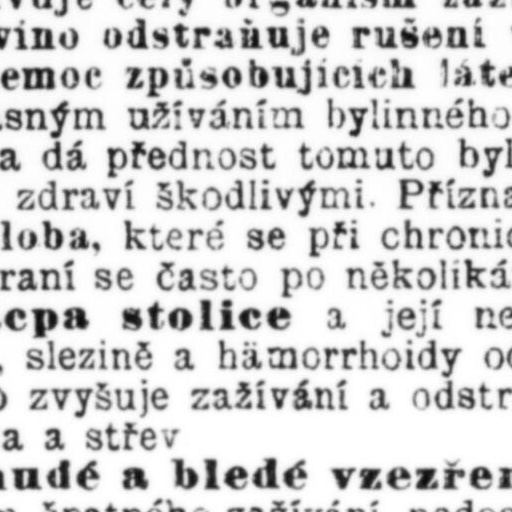

595 0.772073952914


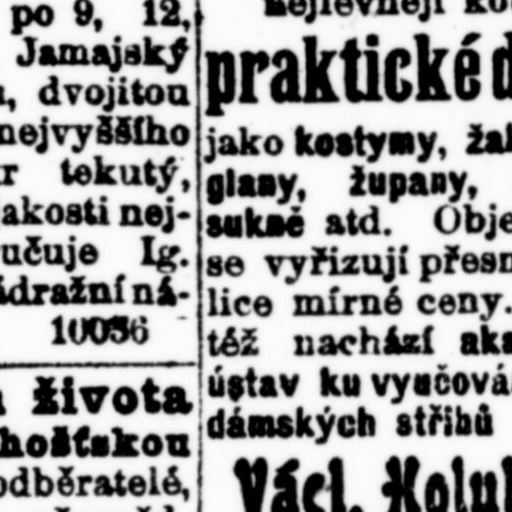

1014 0.778388419725


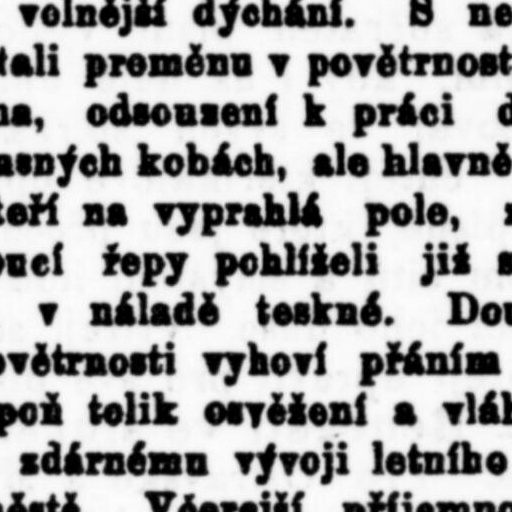

1064 0.785175661295


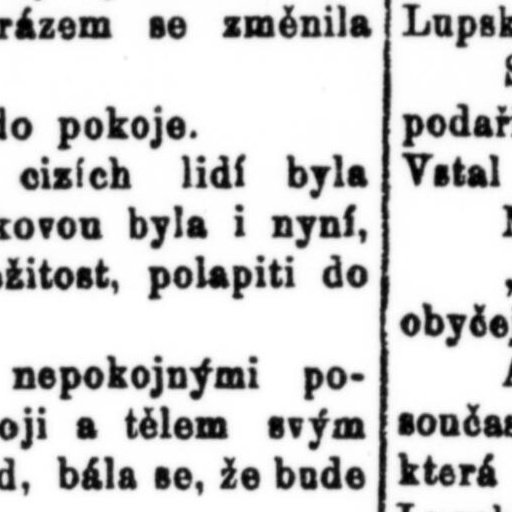

1057 0.786398763186


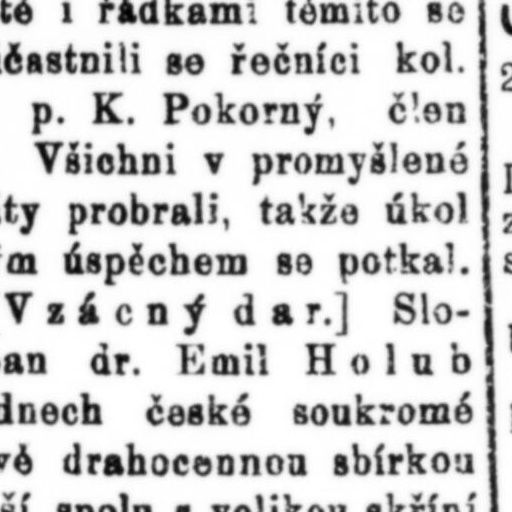

1671 0.79124665011


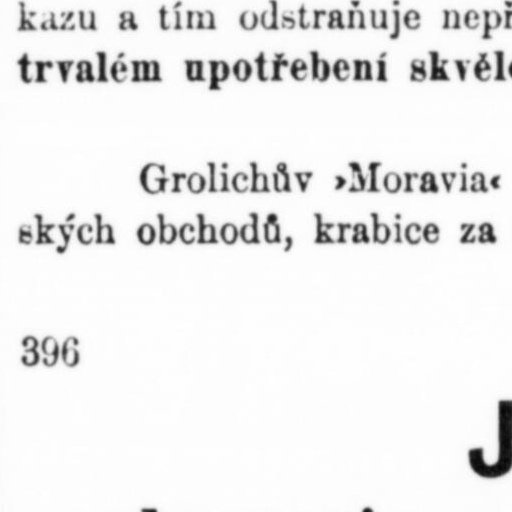

2083 0.797104740371


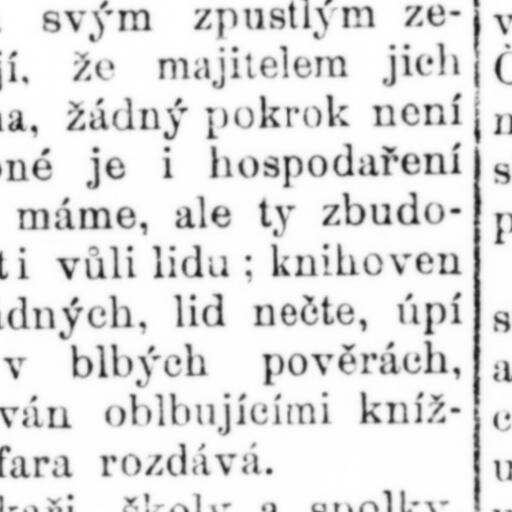

1001 0.797601353626


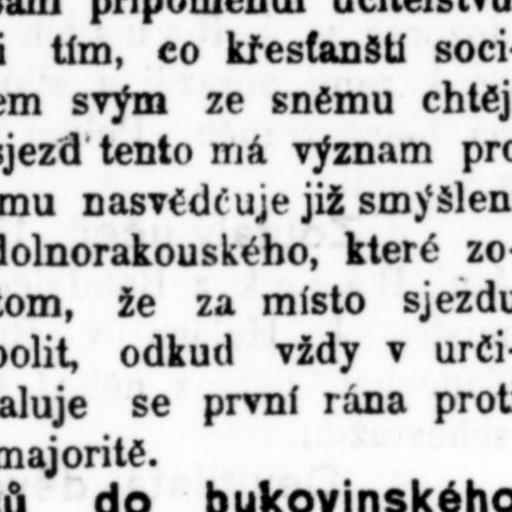

1326 0.799338534647


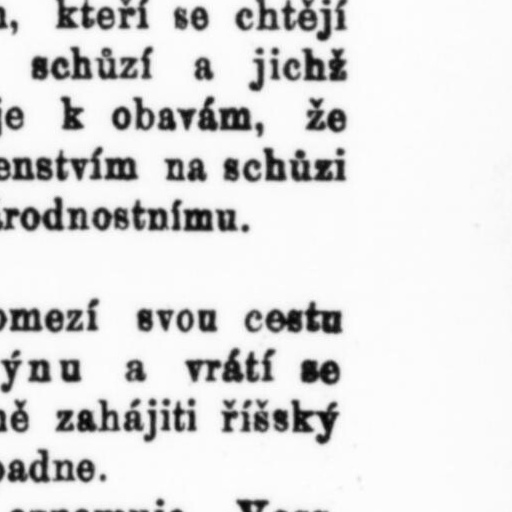

1309 0.801385514825


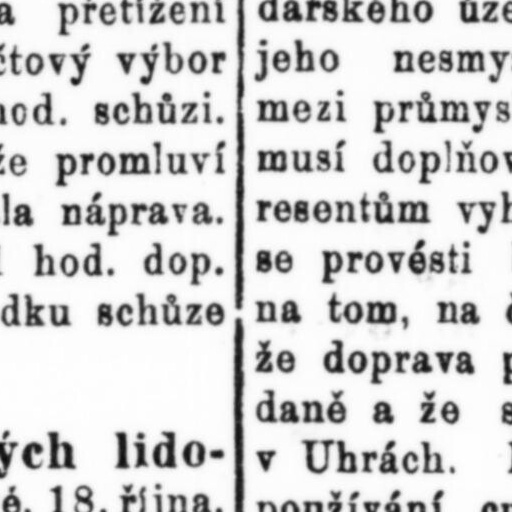

1066 0.835617140529


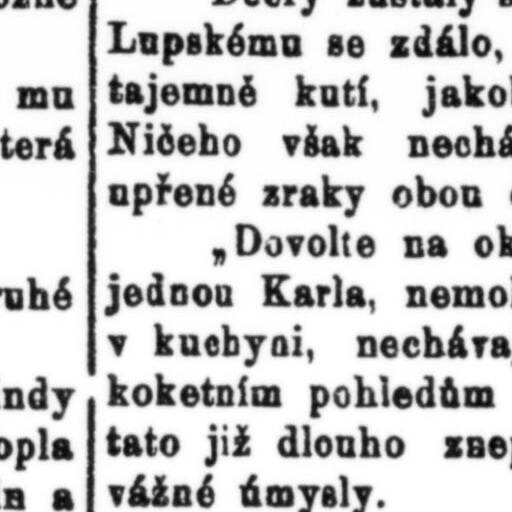

100 0.847737566633


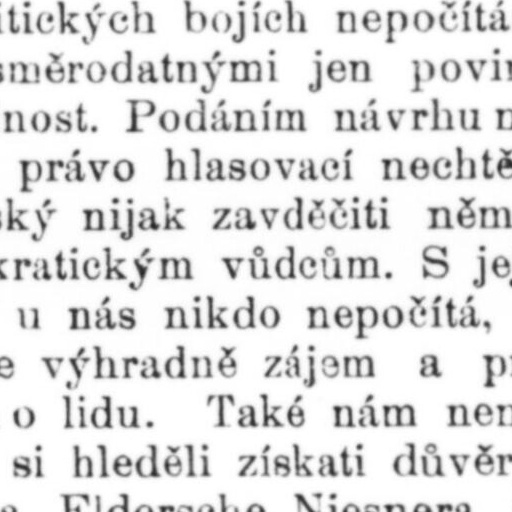

1121 0.882594408062


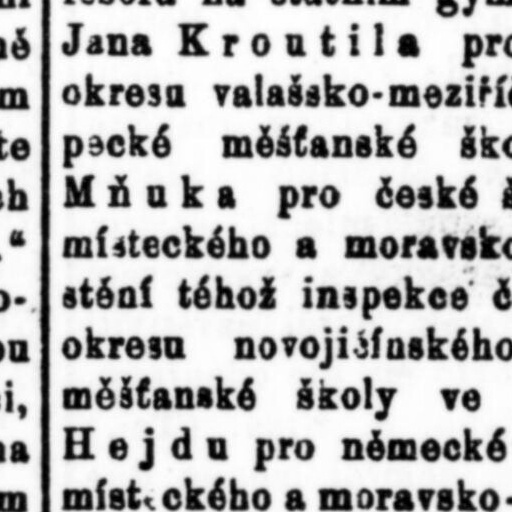

1103 0.88620291702


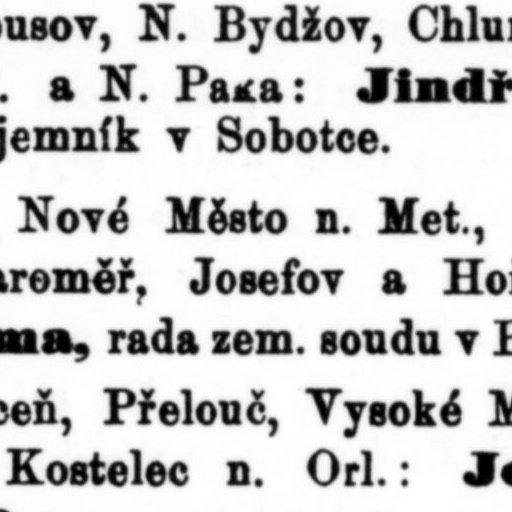

1043 0.894676479658


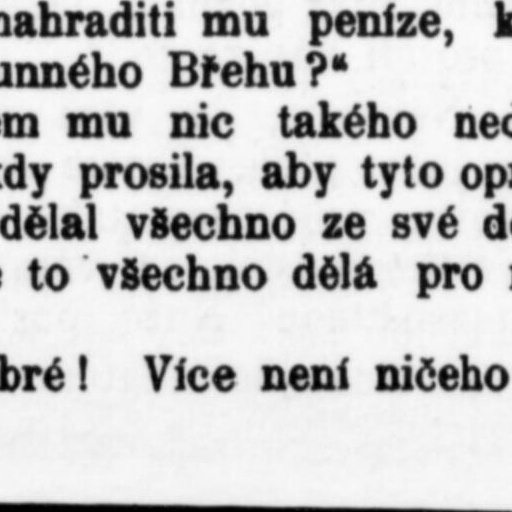

101 0.942065032235


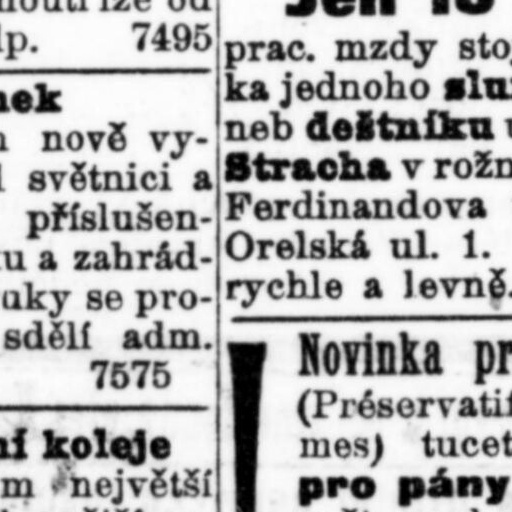

1007 0.947765503442


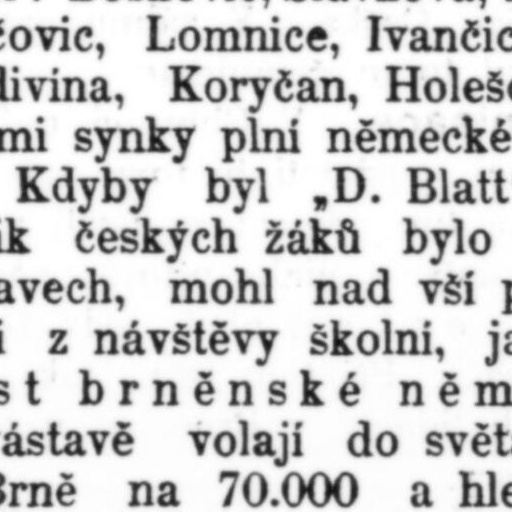

1187 0.955962020779


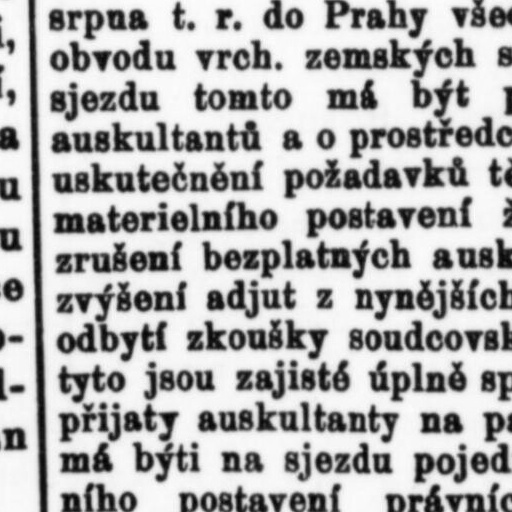

310 0.95821090439


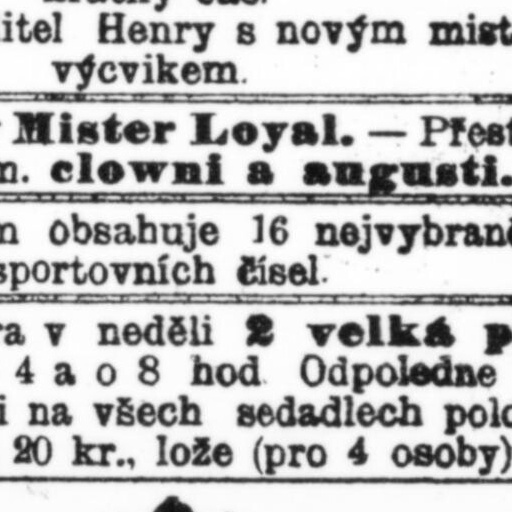

1048 0.960152001863


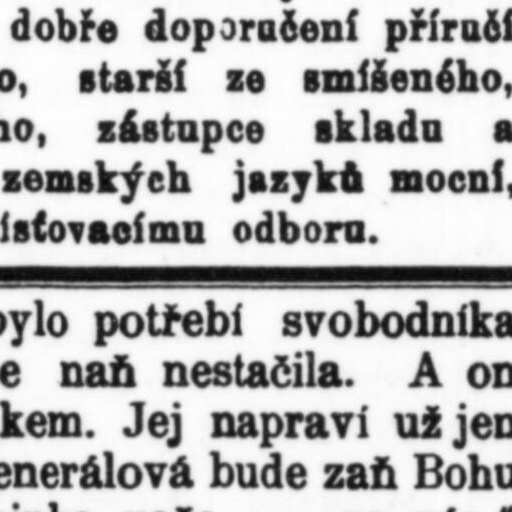

126 0.960373591857


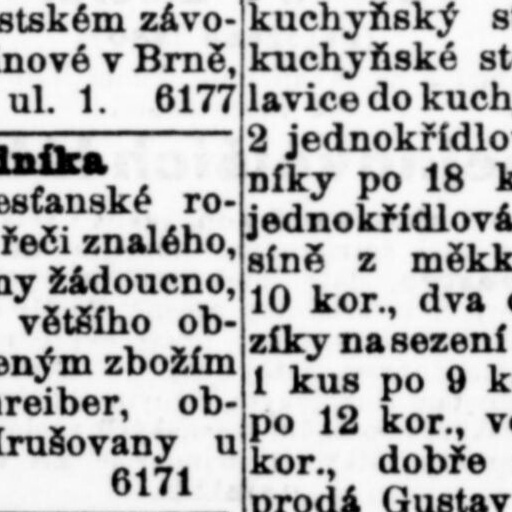

1005 0.985003092826


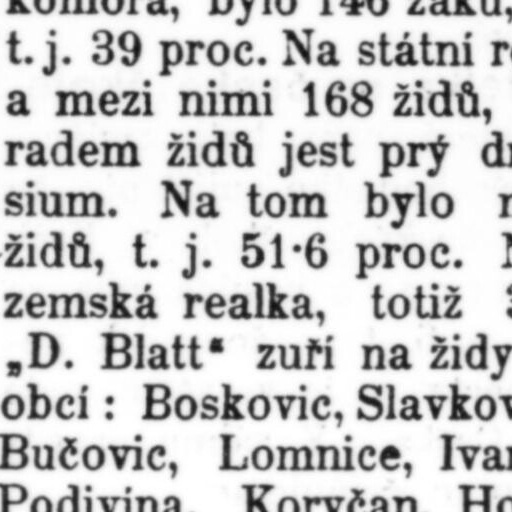

4870 0.988656980566


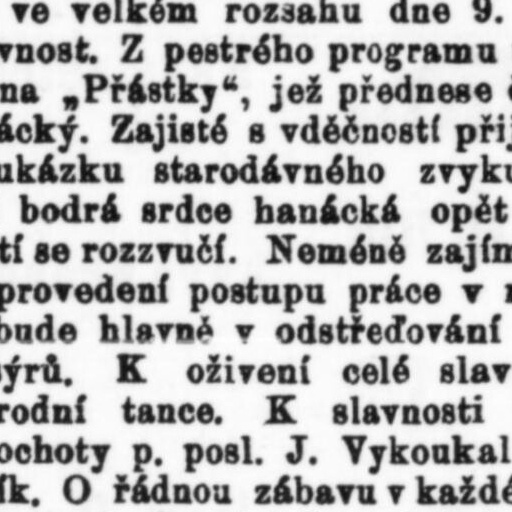

1041 0.991972492574


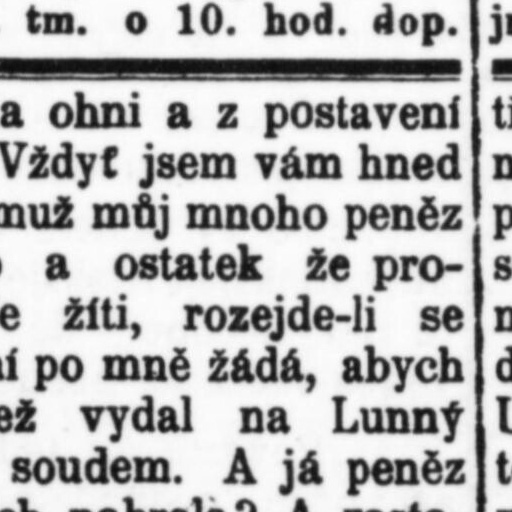

130 1.0


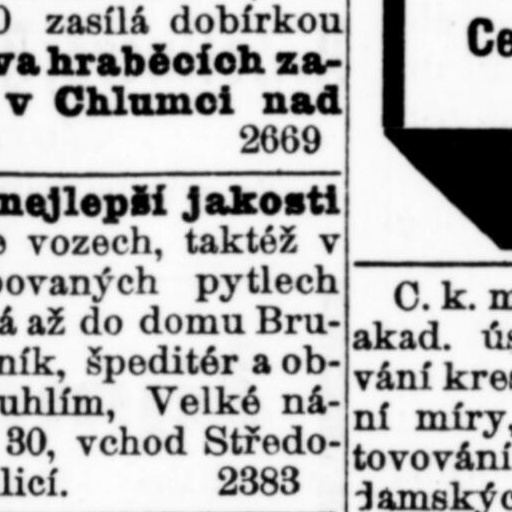

In [5]:
from IPython.display import Image

for i, item in enumerate(np.argsort(normalized)):
    print(mapping[item], normalized[item])
    display(Image(filename='C:\\Users\\LachubCz_NTB\\Documents\\GitHub\\pero-web-data\\crops\\' + str(mapping[item]) + '.jpg')) 